<a href="https://colab.research.google.com/github/catabia/indeed/blob/main/mask_exploration_09_03_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hannah_research/data/mask1.tsv", sep='\t')
df.shape

(724653, 47)

In [ ]:
#pandas!
pd.set_option('display.max_rows', 500) 

#dates!
df['review_date'] = pd.to_datetime(df['review_date'])
df.set_index(pd.DatetimeIndex(df['review_date']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724653 entries, 0 to 724652
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   platform              724653 non-null  object        
 1   scrape_company_num    724653 non-null  int64         
 2   date_scraped          724653 non-null  object        
 3   scrape_folder_name    724653 non-null  object        
 4   scrape_file_name      724653 non-null  object        
 5   base_url              724653 non-null  object        
 6   page_num              724653 non-null  int64         
 7   parent_company        724653 non-null  object        
 8   be_careful            724653 non-null  int64         
 9   company_name          724653 non-null  object        
 10  scraped_from_url      724653 non-null  object        
 11  empid                 724653 non-null  object        
 12  language              0 non-null       float64       
 13 

Text(0.5, 1.0, 'Reviews per Year')

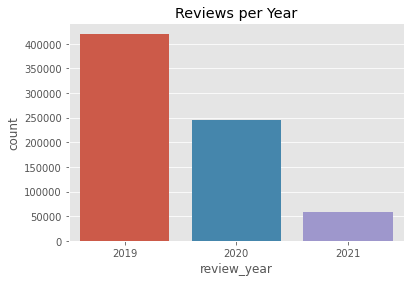

In [ ]:
sns.countplot(data=df, x='review_year')
plt.title("Reviews per Year")

In [ ]:
df['month_year'] = pd.to_datetime(df['review_date']).dt.strftime('%Y-%m')

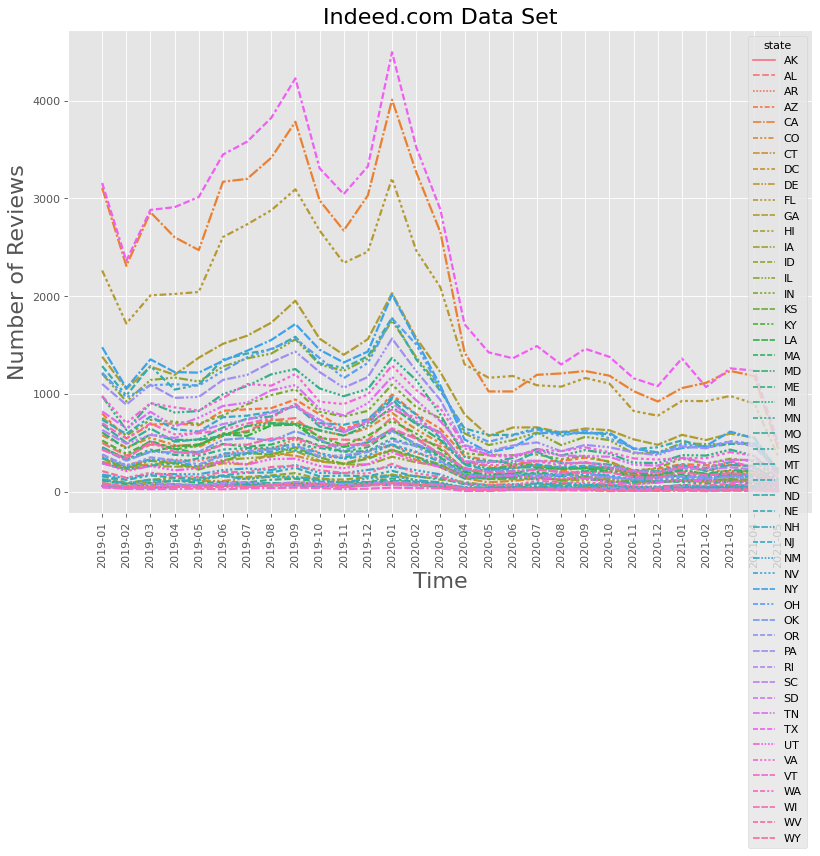

In [ ]:
data_viz = df[['month_year', 'state']]
data_viz = data_viz.groupby(['month_year', 'state']).size().reset_index(name='count')

figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'state', linewidth=2, style = 'state')
plt.title("Indeed.com Data Set", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
#ticks, labels = plt.xticks()

plt.tick_params(axis='x', rotation=90)

#plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
#plt.legend(['Not Birmingham: 33,858 reviews', 'Birmingham: 5,970 reviews'])


In [ ]:
comp = df.groupby(['month_year', 'state']).agg({'overall_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

,month_year,state,mean,count
0,2019-01,AK,3.847458,59
1,2019-01,AL,3.531062,499
2,2019-01,AR,3.685484,372
3,2019-01,AZ,3.533750,800
4,2019-01,CA,3.602638,3108
...,...,...,...,...
1474,2021-05,VT,3.333333,3
1475,2021-05,WA,3.227848,79
1476,2021-05,WI,3.093333,75
1477,2021-05,WV,2.800000,25


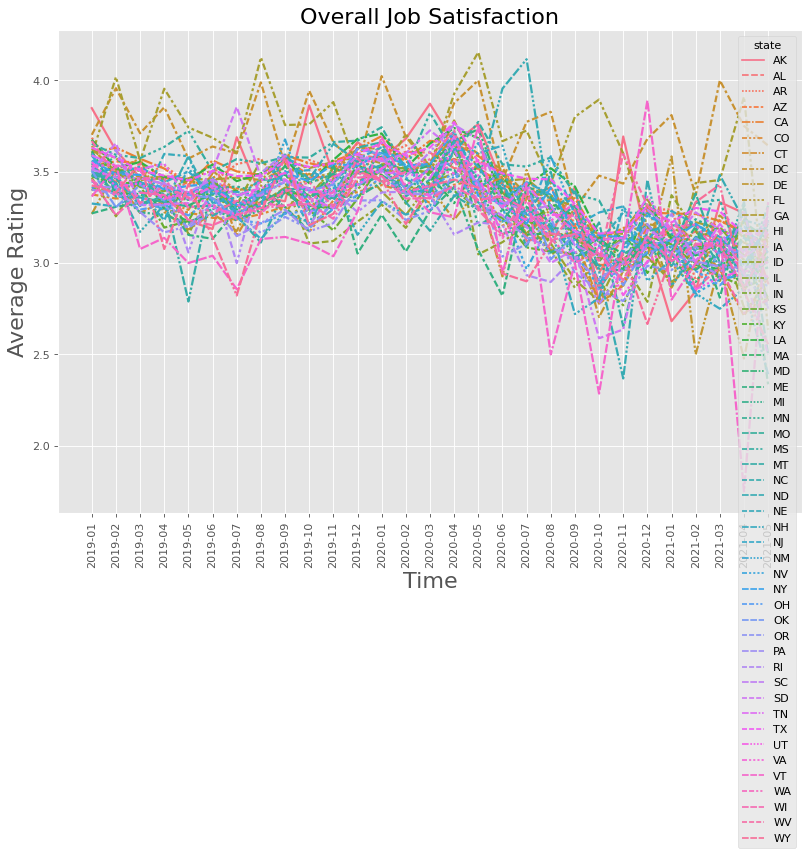

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=comp, x='month_year', y='mean', hue = 'state', linewidth=2, style = 'state')
plt.title("Overall Job Satisfaction", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.tick_params(axis='x', rotation=90)
#ticks, labels = plt.xticks()

States that never made a codebook level 3 mask mandate:

Georgia,
Minnesota,
Nebraska,
South Dakota,
Wyoming,


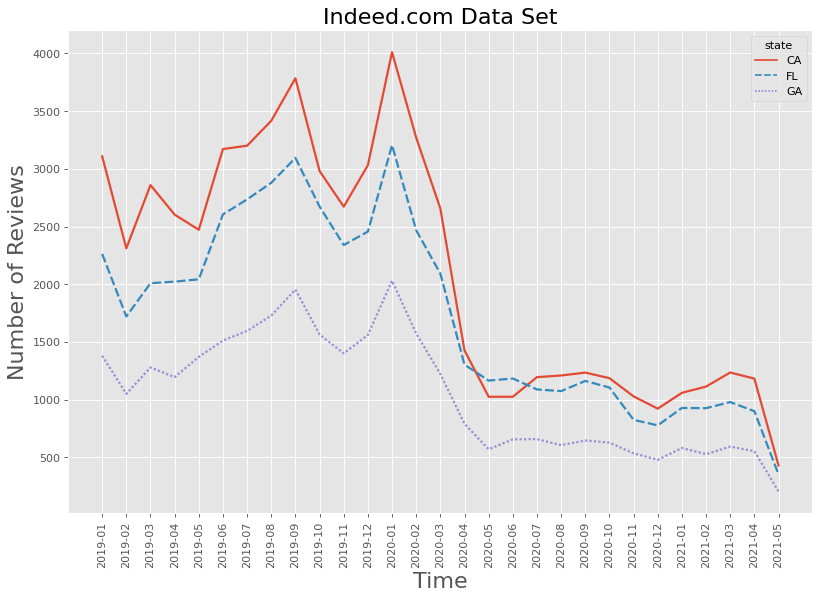

In [ ]:
sub = df[df.state.isin(['GA', 'FL', 'CA'])]
data_viz = sub.groupby(['month_year', 'state']).size().reset_index(name='count')

figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=data_viz, x='month_year', y='count', hue = 'state', linewidth=2, style = 'state')
plt.title("Indeed.com Data Set", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
#ticks, labels = plt.xticks()

plt.tick_params(axis='x', rotation=90)

#plt.xticks(ticks=[0,12, 24, 36, 48, 60, 72, 84, 96, 108, 120], labels=[ '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
#plt.legend(['Not Birmingham: 33,858 reviews', 'Birmingham: 5,970 reviews'])

In [ ]:
comp = sub.groupby(['month_year', 'state']).agg({'overall_rating':['mean', 'count']})
comp.columns = ['mean', 'count']
comp.reset_index(inplace=True)
comp

,month_year,state,mean,count
0,2019-01,CA,3.602638,3108
1,2019-01,FL,3.621299,2263
2,2019-01,GA,3.627082,1381
3,2019-02,CA,3.631761,2311
4,2019-02,FL,3.574085,1721
5,2019-02,GA,3.499524,1051
6,2019-03,CA,3.570829,2859
7,2019-03,FL,3.464410,2009
8,2019-03,GA,3.452344,1280
9,2019-04,CA,3.517096,2603


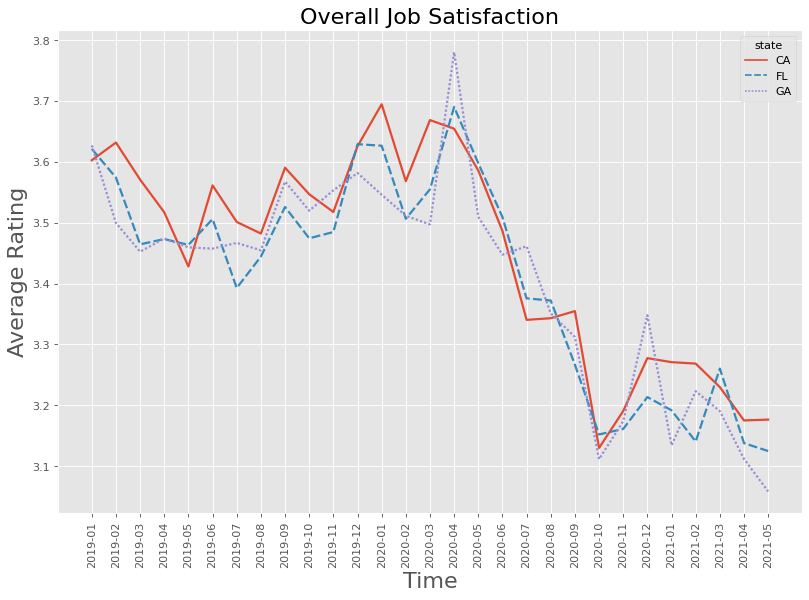

In [ ]:
figure(figsize=(12, 8), dpi=80)
sns.lineplot(data=comp, x='month_year', y='mean', hue = 'state', linewidth=2, style = 'state')
plt.title("Overall Job Satisfaction", fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.tick_params(axis='x', rotation=90)
#ticks, labels = plt.xticks()


